# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/dataset01.csv')
df.head()

,Unnamed: 0,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q025,Q042,Q047,NU_NOTA_MEDIA
0,0,B,M,0.0,3,brasileiro,1,C,1,0,...,1.0,580.0,E,E,2,E,B,C,D,559.26
1,1,B,M,0.0,1,brasileiro,1,A,1,0,...,1.0,560.0,H,H,5,E,B,A,D,568.02
2,2,B,M,0.0,3,brasileiro,1,A,1,0,...,1.0,480.0,B,E,3,E,B,B,A,518.94
3,3,A,M,0.0,1,brasileiro,1,A,1,0,...,1.0,620.0,E,E,5,E,B,D,E,635.12
4,5,B,M,0.0,3,brasileiro,1,A,1,0,...,1.0,600.0,H,B,3,E,B,D,B,597.48


# Amostragem

In [3]:
df = df.sample(1000000)
df.head()

,Unnamed: 0,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q025,Q042,Q047,NU_NOTA_MEDIA
4702799,6817490,B,F,0.0,3,brasileiro,1,A,1,0,...,1.0,520.0,C,C,3,E,A,A,A,480.58
3878773,5480577,D,F,0.0,1,brasileiro,1,D,1,0,...,1.0,420.0,B,B,4,E,B,A,A,502.54
4188481,5961791,D,M,1.0,1,brasileiro,4,N,1,0,...,1.0,420.0,C,E,5,E,A,A,A,488.30
146554,211639,A,F,0.0,3,brasileiro,1,A,1,0,...,1.0,600.0,B,B,3,E,B,A,A,527.46
4521524,6512982,B,M,0.0,3,brasileiro,2,N,2,0,...,1.0,560.0,F,E,4,D,A,A,A,503.72


## Média da nota da amostragem

count    995432.00
mean        511.46
std          74.60
min           0.00
25%         460.62
50%         502.30
75%         554.50
max         853.98
Name: NU_NOTA_MEDIA, dtype: object


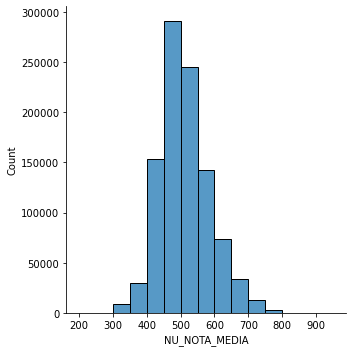

In [4]:
print('{}'.format(df['NU_NOTA_MEDIA'].describe().apply('{:.2f}'.format)))
sns.displot(x=df['NU_NOTA_MEDIA'], bins = range(200, 1000, 50))

- **Como pode ver a média com todos os dados era de 511.40 com um máximo de 857.64, enquanto a nossa amostragem manteve um média próxima à real.**

# Extração de Conhecimento

In [6]:
def graphs(col, title = None, xticks = None, sort = False, rot = 0):
    
    tests = ["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_REDACAO","NU_NOTA_MEDIA"]
    labels = ['Matemática', 'Linguagens e Códigos', 'Ciências Humanas', 'Ciências da Natureza', 'Redação', 'MÉDIA']
    group = df.groupby(col)[tests].mean()
    errors = 1
    if sort:
        group = group.sort_values('NU_NOTA_MEDIA', ascending=False)
    else:
        del(errors)
        errors = df.groupby(col)[tests].std()
    categories = sorted(df[col].unique())
            
    fonte = {'family': 'Arial', 'color': 'blue' ,'size': '25'}
    fonte2 = {'family': 'Arial', 'size': '12'}
    

    ax = group.plot(
        kind = 'bar',
        figsize=(18,8),
        rot = rot,
        grid = True,
        colormap = 'Blues',
        logy=True,
        ylabel = 'Média',
        yerr = np.log(errors)
    )
    
    if xticks: ax.set_xticklabels(xticks)
    ax.grid('on', color='grey', linestyle=':', linewidth=1)
    ax.legend(loc='upper right', shadow=True, prop = fonte2, title = 'Provas', labels = labels, title_fontsize = '15')
    if title:
        ax.set_title(f'{title}', fontdict = fonte, loc = 'center')
    plt.show()
    print()

# Treineiro

- Podemos notar pelos graficos abaixo que o estudante ser treineiro ou não, não interfere em nenhuma nota.

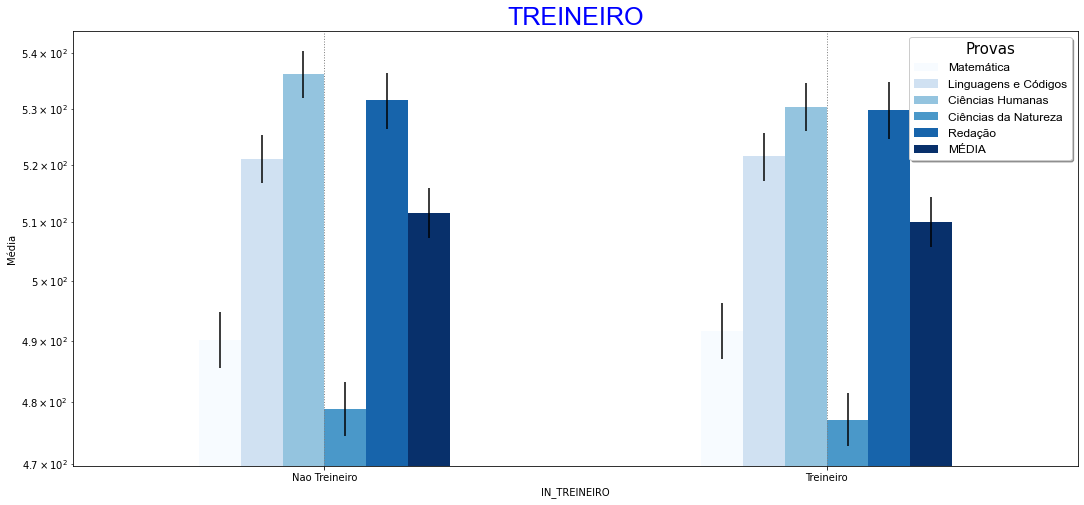

In [7]:
graphs(
    col = 'IN_TREINEIRO',
    title = 'TREINEIRO',
    xticks = ['Nao Treineiro', 'Treineiro']
)

# Idade

- A nota média tende a ser menor à medida em que a idade é maior, ressaltaltando que a média da redação e a matemática são uma das principais responsáveis pela queda da nota média. 

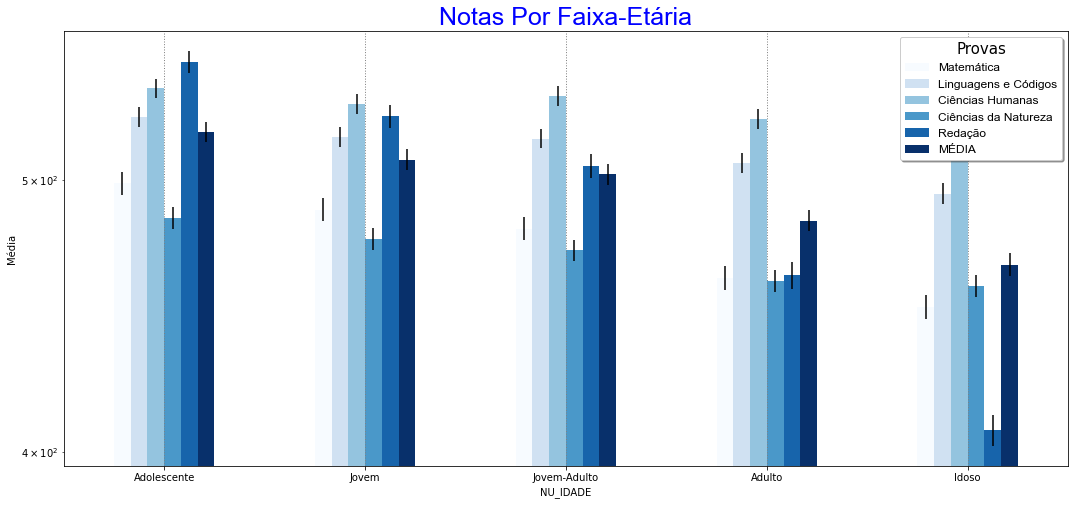

In [8]:
graphs(
    col = 'NU_IDADE',
    title = 'Notas Por Faixa-Etária',
    xticks = ['Adolescente', 'Jovem', 'Jovem-Adulto', 'Adulto', 'Idoso']
)

# Sexo

- O sexo feminino tende a ser melhor em redações. 
- O sexo masculino por sua vez tende a se destacar mais nas provas de matemática. 
- o sexo feminino por ser o mais populoso tem uma variância maior dados fazendo a média geral diminuir, mas mesmo assim, o sexo masculino tende a ter médias um pouco maiores.

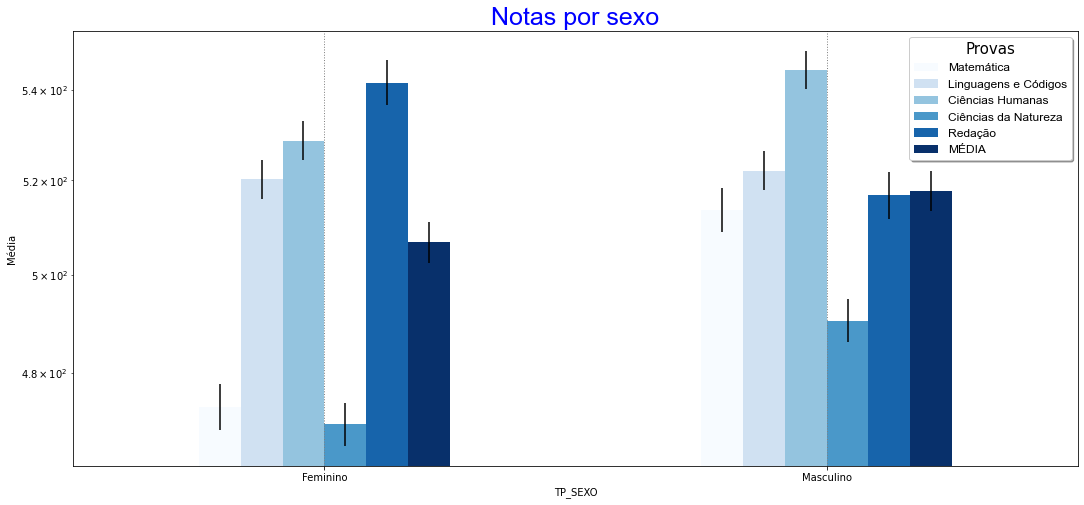

In [9]:
graphs(
    col = 'TP_SEXO',
    title = 'Notas por sexo',
    xticks = ['Feminino', 'Masculino']
)

# Estado Cívil

- Solteiros tendem a ter melhores notas e podemos fazer um traçado com as idades, uma vez que jovem tendem a ser mais solteiros, enquanto casados possuem idades mais elevadas. O mesmo se aplica para Divorciados e Viúvos. 

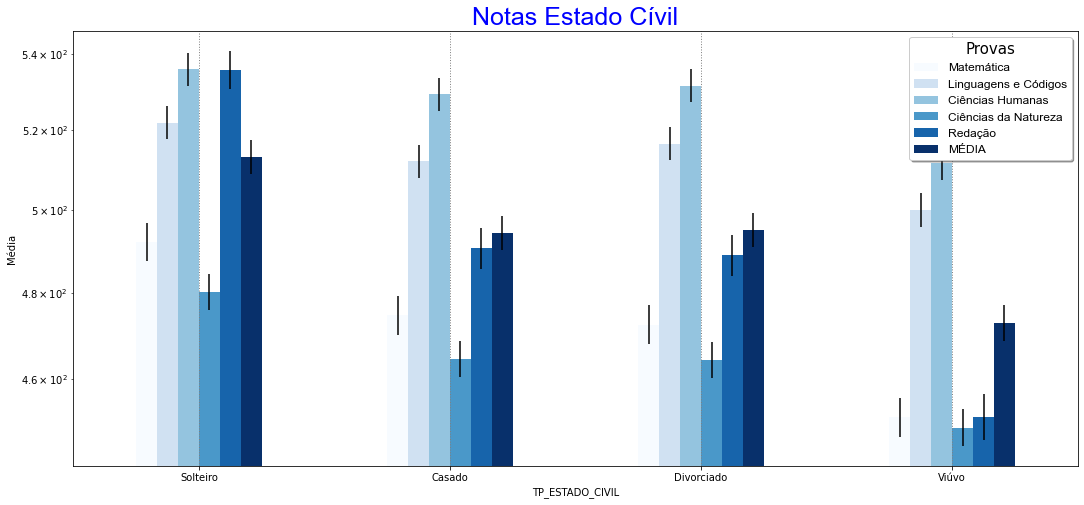

In [10]:
graphs(
    col = 'TP_ESTADO_CIVIL',
    title = 'Notas Estado Cívil',
    xticks = ['Solteiro', 'Casado', 'Divorciado', 'Viúvo'],
)

# Sabatista

- Apesar da baixa amostra de sabatistas dentro do dataset, podemos observar que praticamente não existe uma diferença significativa, apesarem de irem melhor em provas de humanas.

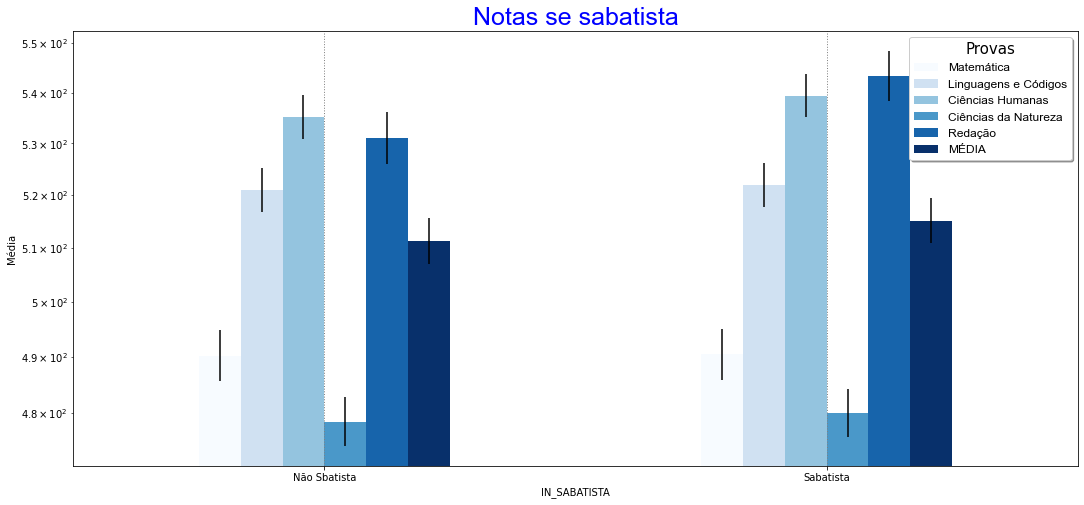

In [11]:
graphs(
    col = 'IN_SABATISTA',
    title = 'Notas se sabatista',
    xticks = ['Não Sbatista', 'Sabatista'],
)

# Estado

- Como podemos notar, os três melhores estados são RJ, SP e SC respectivamente;
- Os piores estados são AC, MA, AP espectivamente. 

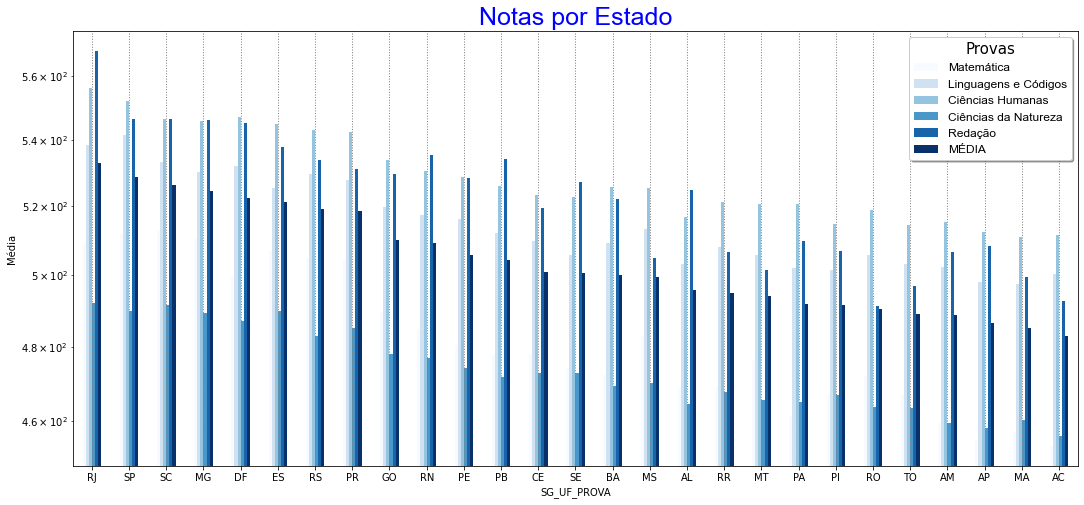

In [12]:
graphs(
    col = 'SG_UF_PROVA',
    title = 'Notas por Estado',
    sort = True
)

# Escolaridade do Pai

- Podemos notar que quanto maior a escolaridade do Pai, melhor serão as notas.

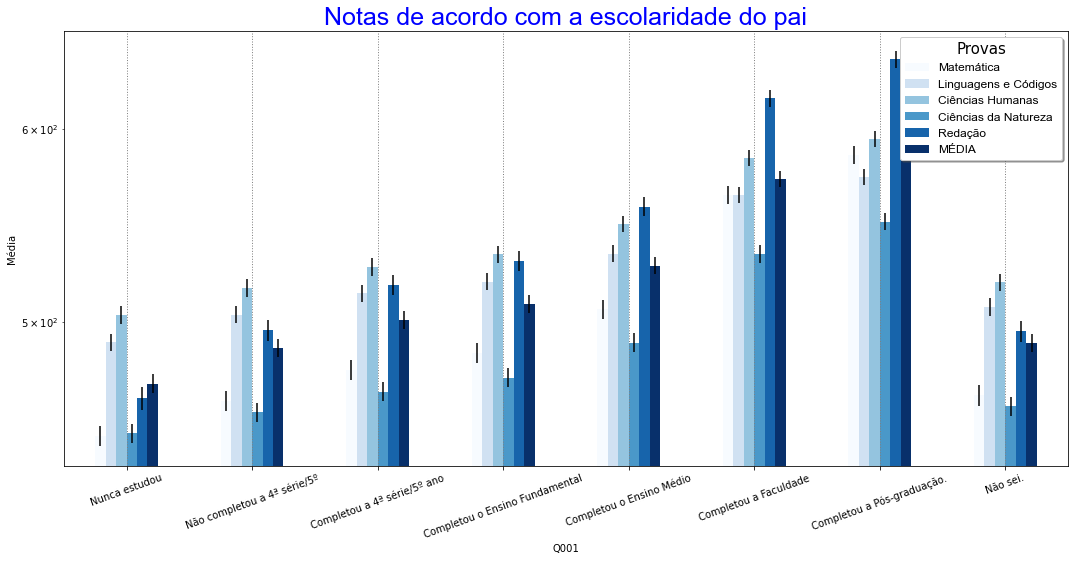

In [13]:
graphs(
    col = 'Q001',
    title = 'Notas de acordo com a escolaridade do pai',
    xticks = [
        'Nunca estudou',
        'Não completou a 4ª série/5º',
        'Completou a 4ª série/5º ano',
        'Completou o Ensino Fundamental',
        'Completou o Ensino Médio',
        'Completou a Faculdade',
        'Completou a Pós-graduação.',
        'Não sei.'
    ],
    rot = 20
)

# Escolaridade da Mãe

- Assim como ocorreu com os dados dos pais, quanto maior a escolaridade da mãe, maior será a nota no enem.

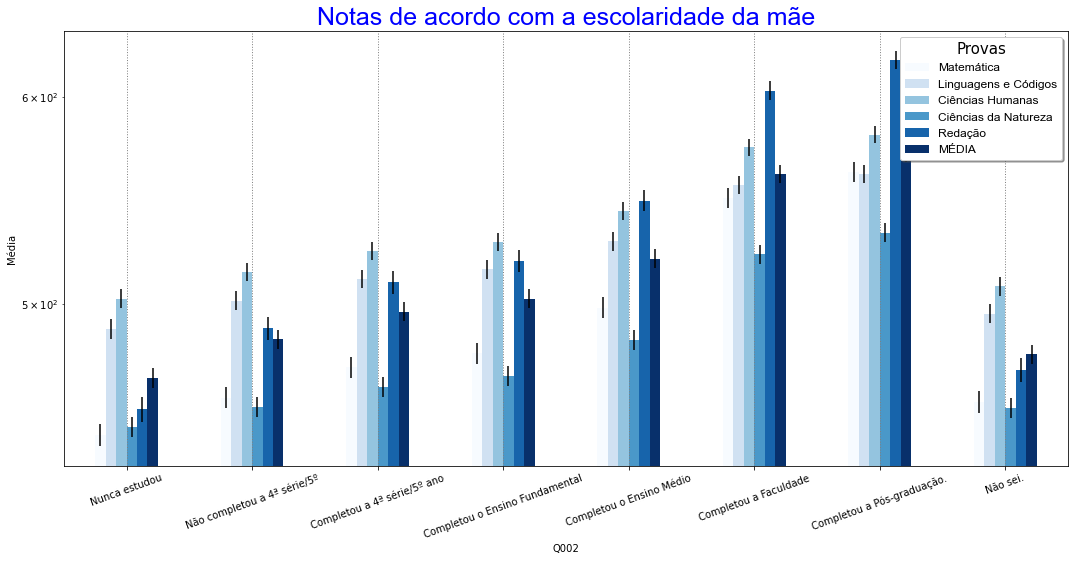

In [14]:
graphs(
    col = 'Q002',
    title = 'Notas de acordo com a escolaridade da mãe',
    xticks = [
        'Nunca estudou',
        'Não completou a 4ª série/5º',
        'Completou a 4ª série/5º ano',
        'Completou o Ensino Fundamental',
        'Completou o Ensino Médio',
        'Completou a Faculdade',
        'Completou a Pós-graduação.',
        'Não sei.'
    ],
    rot = 20
)

# Pessoas na Residência

- podemos notar que mais de 4 pessoas morando na mesma residência provoca um sucessivas queda nas médias das notas na medida que o número aumenta. 
- Por conterem poucos dados de residências com mais de 14 moradores, esses casos fogem a essa regra. 

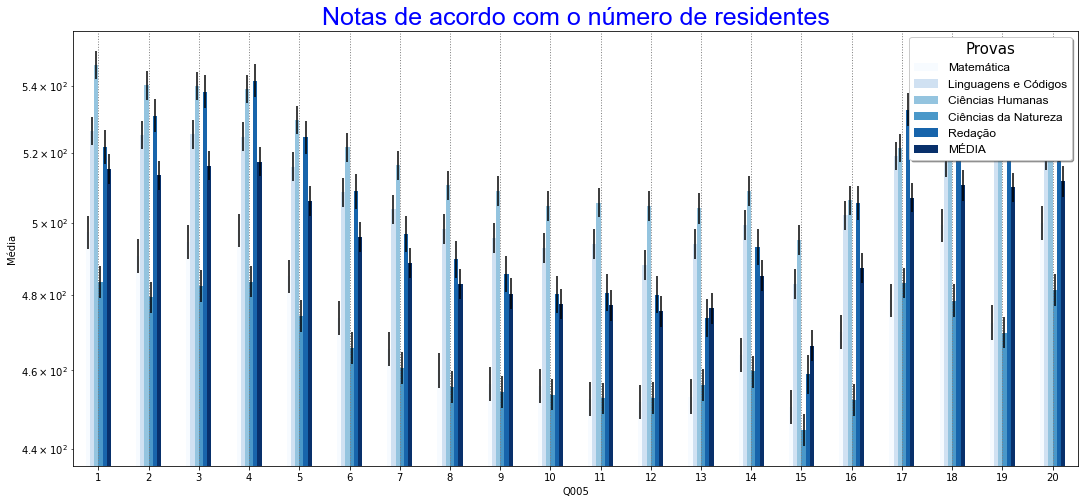

In [15]:
graphs(
    col = 'Q005',
    title = 'Notas de acordo com o número de residentes',
)

# Renda Mensal

- Podemos notar clareamente que a renda familiar influencia nas notas médias dos estudantes.

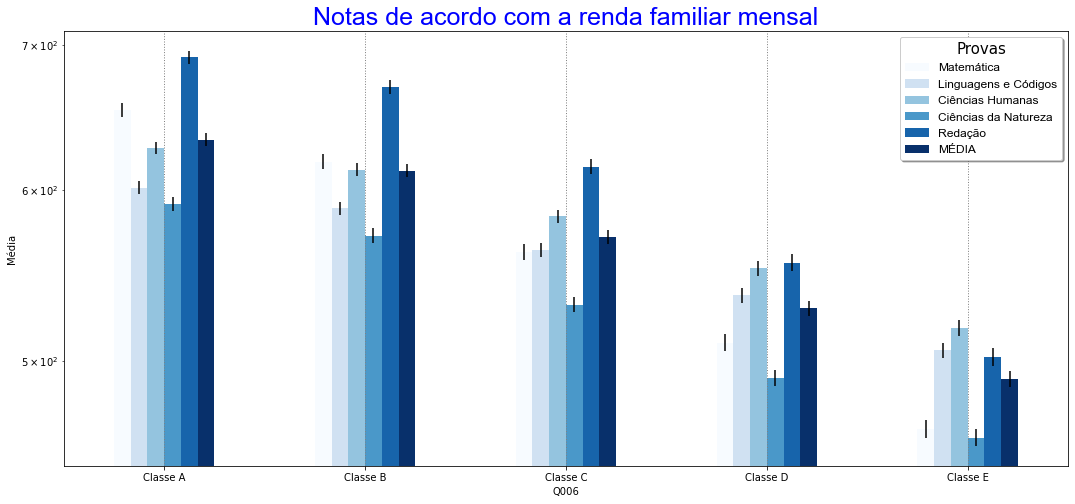

In [16]:
graphs(
    col = 'Q006',
    title = 'Notas de acordo com a renda familiar mensal',
    xticks = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E']
)

# Residência com Internet

- Residências que possuem internet influenciam positivamente nas notas.

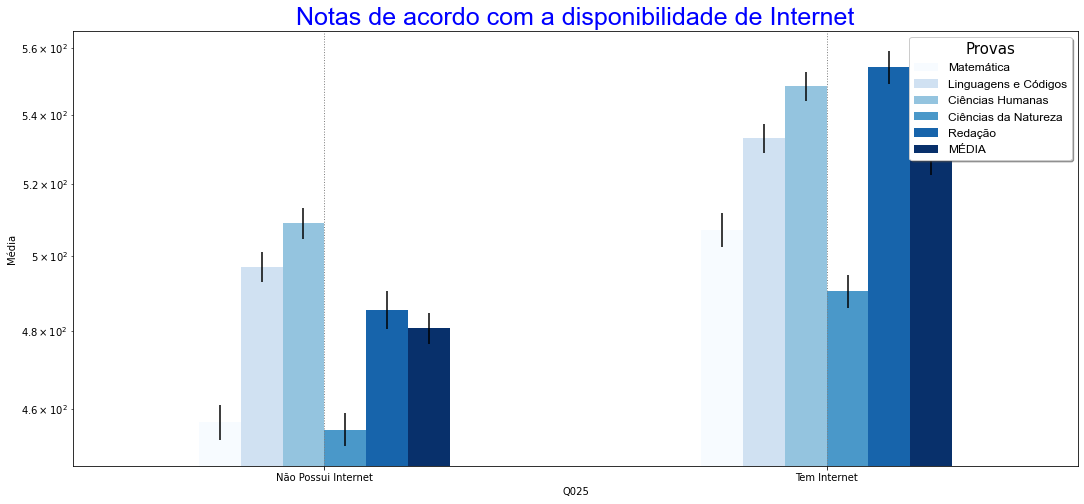

In [17]:
graphs(
    col = 'Q025',
    title = 'Notas de acordo com a disponibilidade de Internet',
    xticks = ['Não Possui Internet', 'Tem Internet']
)

# Ensino Médio

- Os alunos de escola particulares, indiferentes da bolsa possuem notas médias melhores, em seguida os alunos que tiveram estudos hibridos em publico e privado, e por fim as piores médias estão entre os alunos que obtiveram as piores médias.

- Interessante notar que alunos hibridos possuem notas semelhantes entre aqueles que usaram ou não bolsas.

- Enquanto os alunos que somente estudaram em ecola privada sem bolsa possuem notas melhores em relação aos que conseguiram estudar com bolsas.

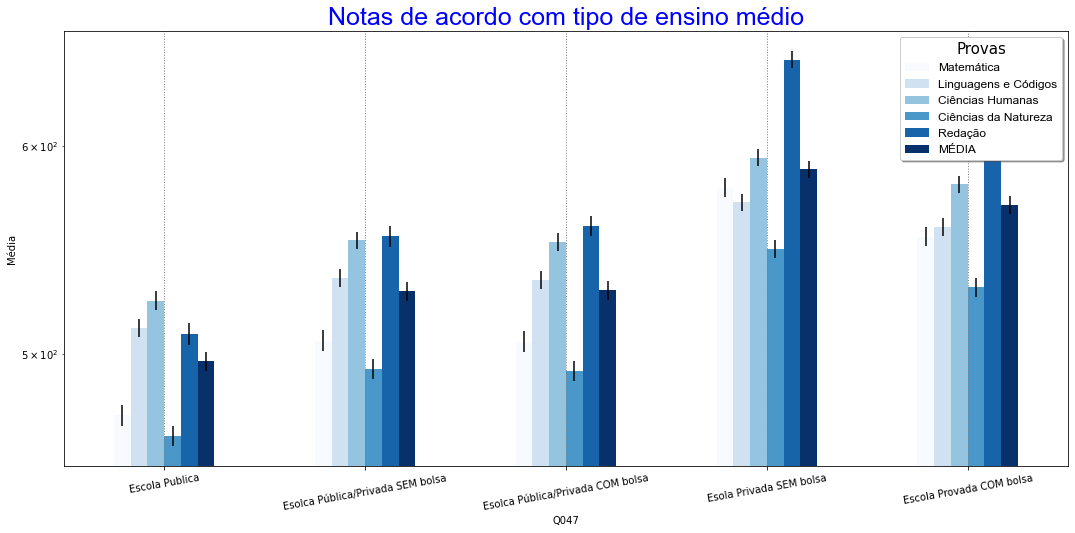

In [18]:
graphs(
    col = 'Q047',
    title = 'Notas de acordo com tipo de ensino médio',
    xticks =  [
         'Escola Publica',
         'Esolca Pública/Privada SEM bolsa',
         'Esolca Pública/Privada COM bolsa',
         'Esola Privada SEM bolsa',
         'Escola Provada COM bolsa'
     ],
    rot = 10
)

# Raça

- Podemos notar alguns detalhes, o primeiro é que as pessoas que não delcaram a nota possuem médias semelhantes com a que se auto declaram brancas, sendo elas com as melhores médias. 

- O mesmo se assemelha entre os que se declaram pardos e pretos que possuem médias semelhantes ficando em terceiro lugar. 

- Olhando, os que auto delcaram indígenas são os que possuem as piores médias.

- Importante ressaltar a baixa quantidade de dados para os que não haviam esta informação, fazendo com que as médias sejam pouco confiáveis.
    - Apresentam as piores redações, mas mantês as melhores médias. 

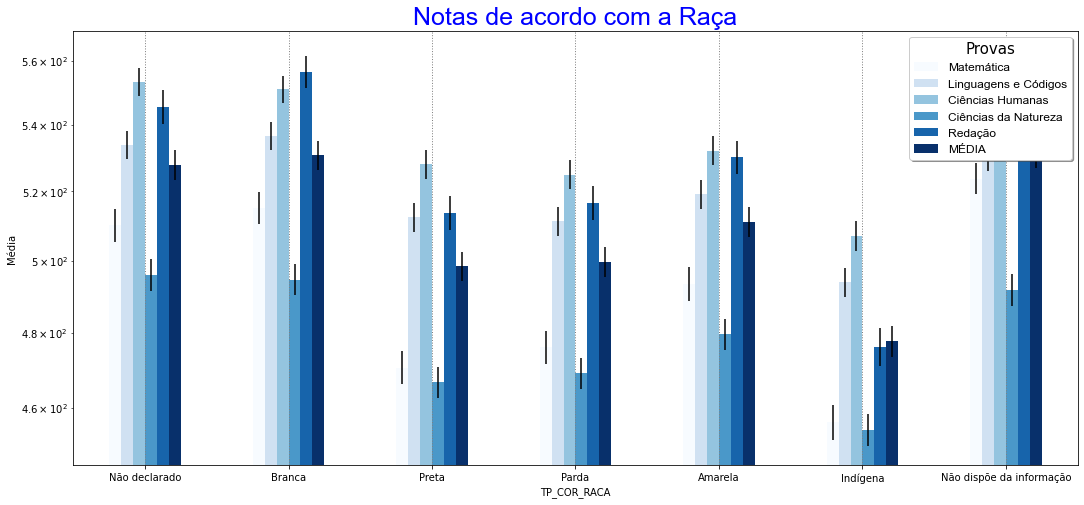

In [19]:
graphs(
    col = 'TP_COR_RACA',
    title = 'Notas de acordo com a Raça',
    xticks = [
        'Não declarado',
        'Branca',
        'Preta',
        'Parda',
        'Amarela',
        'Indígena', 
        'Não dispõe da informação'
    ]
)

# Ano de Conclusão do Ensino Médio

- Podemos notar que quanto mais tempo o aluno demora para realizar a prova, menor em média sãos as médias das notas.

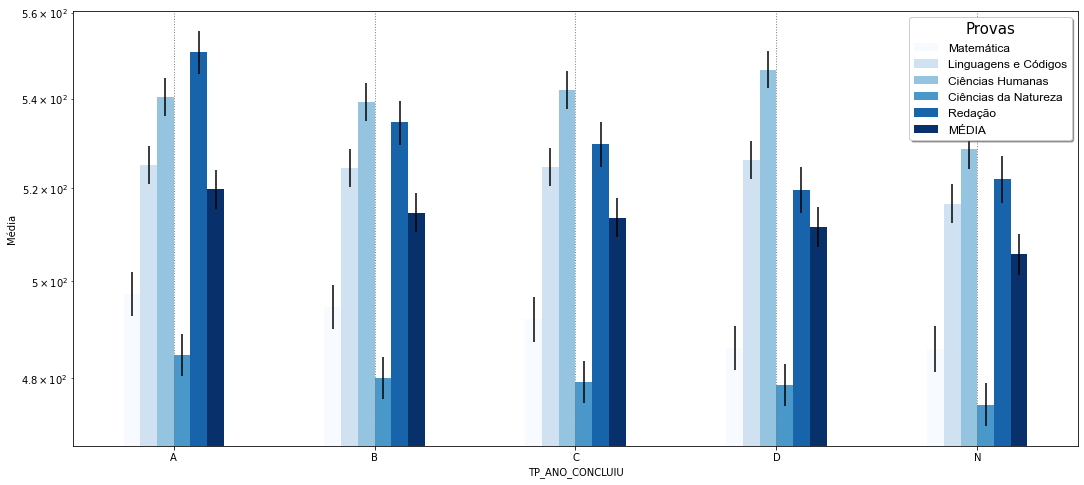

In [20]:
graphs(
    col = 'TP_ANO_CONCLUIU',
)

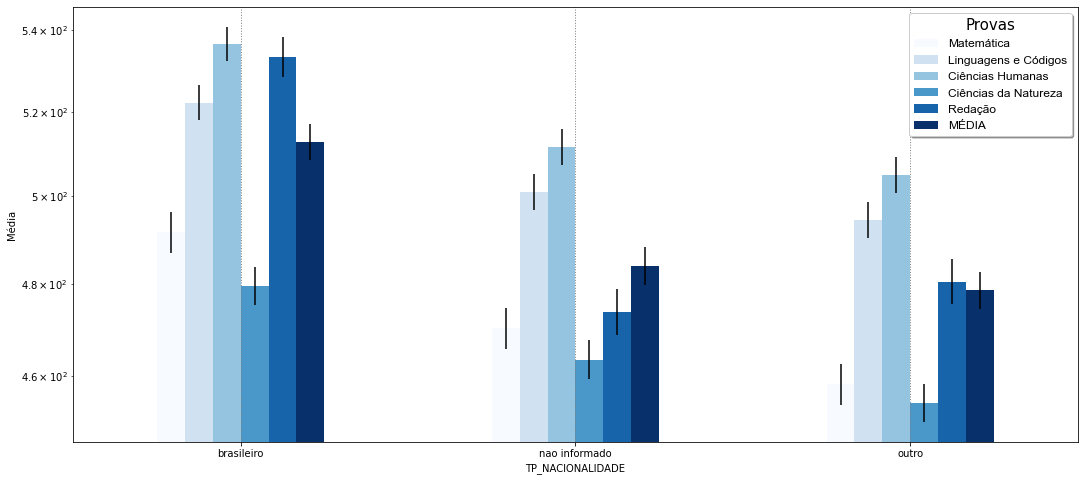

In [21]:
graphs(
    col = 'TP_NACIONALIDADE',
)

# Ano de Conclusão do Ensino Médio

- Podemos notar que os alunos que concluíram o ensimo médio possuem notas melhores que os demais.
- Isso se aplica ao grupo que iria concluir o ensino médio no mesmo ano que a prova do enem, mostrando que o ensino médio pode fazer diferença nas médias dos alunos.

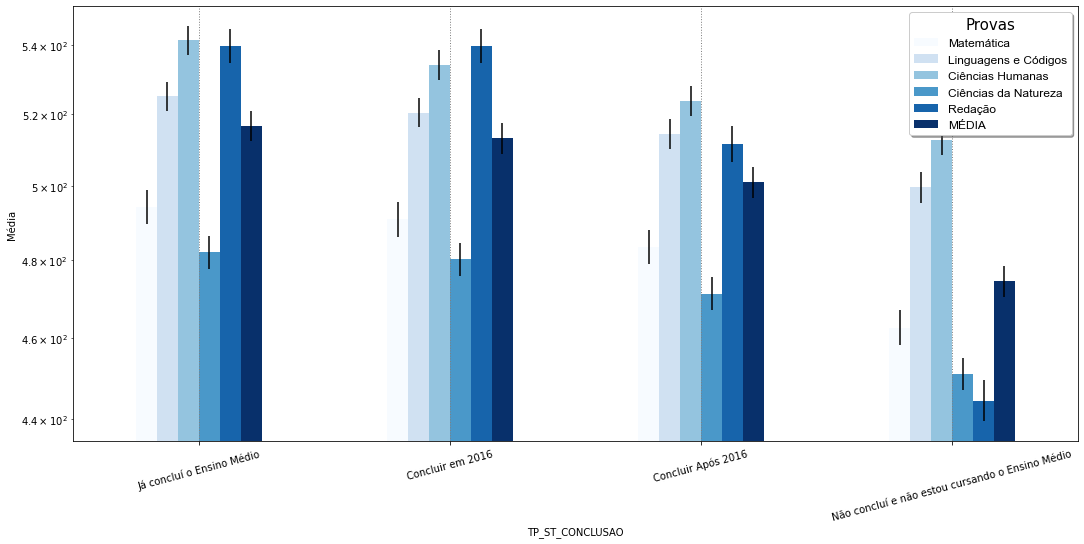

In [22]:
graphs(
    col = 'TP_ST_CONCLUSAO',
    xticks = [
        'Já concluí o Ensino Médio',
        'Concluir em 2016',
        'Concluir Após 2016',
        'Não concluí e não estou cursando o Ensino Médio'
    ],
    rot = 15
)

# Alunos Faltantes

- Por causa a amostragem pequena, não podemos avaliar de fato estes dados, mas podemos notar que houveram mais faltas no segundo dia em relação ao primeiro dia.

In [23]:
def analisePresenca(atributo, df):
    dadosF = df[df[atributo] == 0]
    dadosE = df[df[atributo] == 2]
    percentualF = (len(dadosF)/len(df)) * 100
    percentualE = (len(dadosE)/len(df)) * 100
    print('\nAnalisando o atributo {}, no total de {} candidatos: '. format(atributo, len(df)))
    print(len(dadosF),' ({:.4f}%) Faltaram à prova '. format(percentualF))
    print(len(dadosE),' ({:.4f}%) Foram Eliminados da Prova\n'. format(percentualE))

In [24]:
analisePresenca('TP_PRESENCA_MT', df)
analisePresenca('TP_PRESENCA_LC', df)
analisePresenca('TP_PRESENCA_CH', df)
analisePresenca('TP_PRESENCA_CN', df)


Analisando o atributo TP_PRESENCA_MT, no total de 1000000 candidatos: 
0  (0.0000%) Faltaram à prova 
0  (0.0000%) Foram Eliminados da Prova


Analisando o atributo TP_PRESENCA_LC, no total de 1000000 candidatos: 
0  (0.0000%) Faltaram à prova 
0  (0.0000%) Foram Eliminados da Prova


Analisando o atributo TP_PRESENCA_CH, no total de 1000000 candidatos: 
4215  (0.4215%) Faltaram à prova 
196  (0.0196%) Foram Eliminados da Prova


Analisando o atributo TP_PRESENCA_CN, no total de 1000000 candidatos: 
4215  (0.4215%) Faltaram à prova 
196  (0.0196%) Foram Eliminados da Prova



# Escolha dos Dados

Com base na extração iremos selecionar os melhores atributos descritivos, e gerar um dataset que seja capaz de prever a nota média do aluno.

In [5]:
lista = [
    'NU_IDADE',
    'TP_ESTADO_CIVIL',
    'TP_SEXO',
    'TP_COR_RACA',
    'TP_ANO_CONCLUIU',
    'Q002', 
    'Q006',
    'Q025',
    'Q047', 
    'NU_NOTA_MT',
    'NU_NOTA_LC',
    'NU_NOTA_CH',
    'NU_NOTA_CN',
    'NU_NOTA_REDACAO',
    'NU_NOTA_MEDIA'
]

df = df[lista]
df = df.reset_index(drop = True)
df.to_csv('dataset/enem_resumo.csv', index= False)
df.head()

,NU_IDADE,TP_ESTADO_CIVIL,TP_SEXO,TP_COR_RACA,TP_ANO_CONCLUIU,Q002,Q006,Q025,Q047,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_REDACAO,NU_NOTA_MEDIA
0,B,0.0,F,3,A,C,E,A,A,463.4,495.9,466.6,457.0,520.0,480.58
1,D,0.0,F,1,D,B,E,B,A,492.6,523.0,538.4,538.7,420.0,502.54
2,D,1.0,M,1,N,E,E,A,A,443.3,511.0,559.8,507.4,420.0,488.30
3,A,0.0,F,3,A,B,E,B,A,480.4,531.6,569.0,456.3,600.0,527.46
4,B,0.0,M,3,N,E,D,A,A,448.5,510.0,508.3,491.8,560.0,503.72
